# Korrelationsanalyse Alex Daten

In [1]:
import pandas as pd
import AnalyticsHandler
import DBHandler

In [2]:
# 1. Neuen DBHandler-Instanz erstellen
dbhandler = DBHandler.DBHandler()

In [3]:
dbhandler.get_latest_timestamp("alex")

datetime.date(2023, 6, 23)

In [4]:
dbhandler.get_data_range("alex")

The range of timestamps in table 'alex' is from 2023-06-08 01:59:35 to 2023-06-23 01:58:22.


(datetime.datetime(2023, 6, 8, 1, 59, 35),
 datetime.datetime(2023, 6, 23, 1, 58, 22))

In [5]:
# 2. Gesamte Daten aus der Datenbank abrufen
df_all_data = dbhandler.db_data_to_df("alex")

In [6]:
# 3. DataFrames für jeden Fall erstellen, indem der gewünschte Zeitbereich ausgewählt wird
df_case1 = df_all_data[(df_all_data['timestamp'] >= "2023-06-09 00:00:00") & (df_all_data['timestamp'] <= "2023-06-10 3:00:00")] # Zu hause (Kochen Elektroherd)
df_case2 = df_all_data[(df_all_data['timestamp'] >= "2023-06-17 18:00:00") & (df_all_data['timestamp'] <= "2023-06-18 05:00:00")] # Am Arbeit (Party)
df_case3 = df_all_data[(df_all_data['timestamp'] >= "2023-06-19 00:00:00") & (df_all_data['timestamp'] <= "2023-06-19 23:59:59")] # Zu Hause (Kochen Gas Herd)

In [7]:
df_case1.to_csv("kochen_elektroherd.csv")
df_case2.to_csv("party.csv")
df_case3.to_csv("kochen_gasherd.csv")

In [13]:
# 4. DataFrames an den AnalyticsHandler übergeben und entsprechende Analysen durchführen
analytics_handler_case1 = AnalyticsHandler.AnalyticsHandler(df_case1)
analytics_handler_case2 = AnalyticsHandler.AnalyticsHandler(df_case2)
analytics_handler_case3 = AnalyticsHandler.AnalyticsHandler(df_case3)

# 1. Fall: Case 09.06


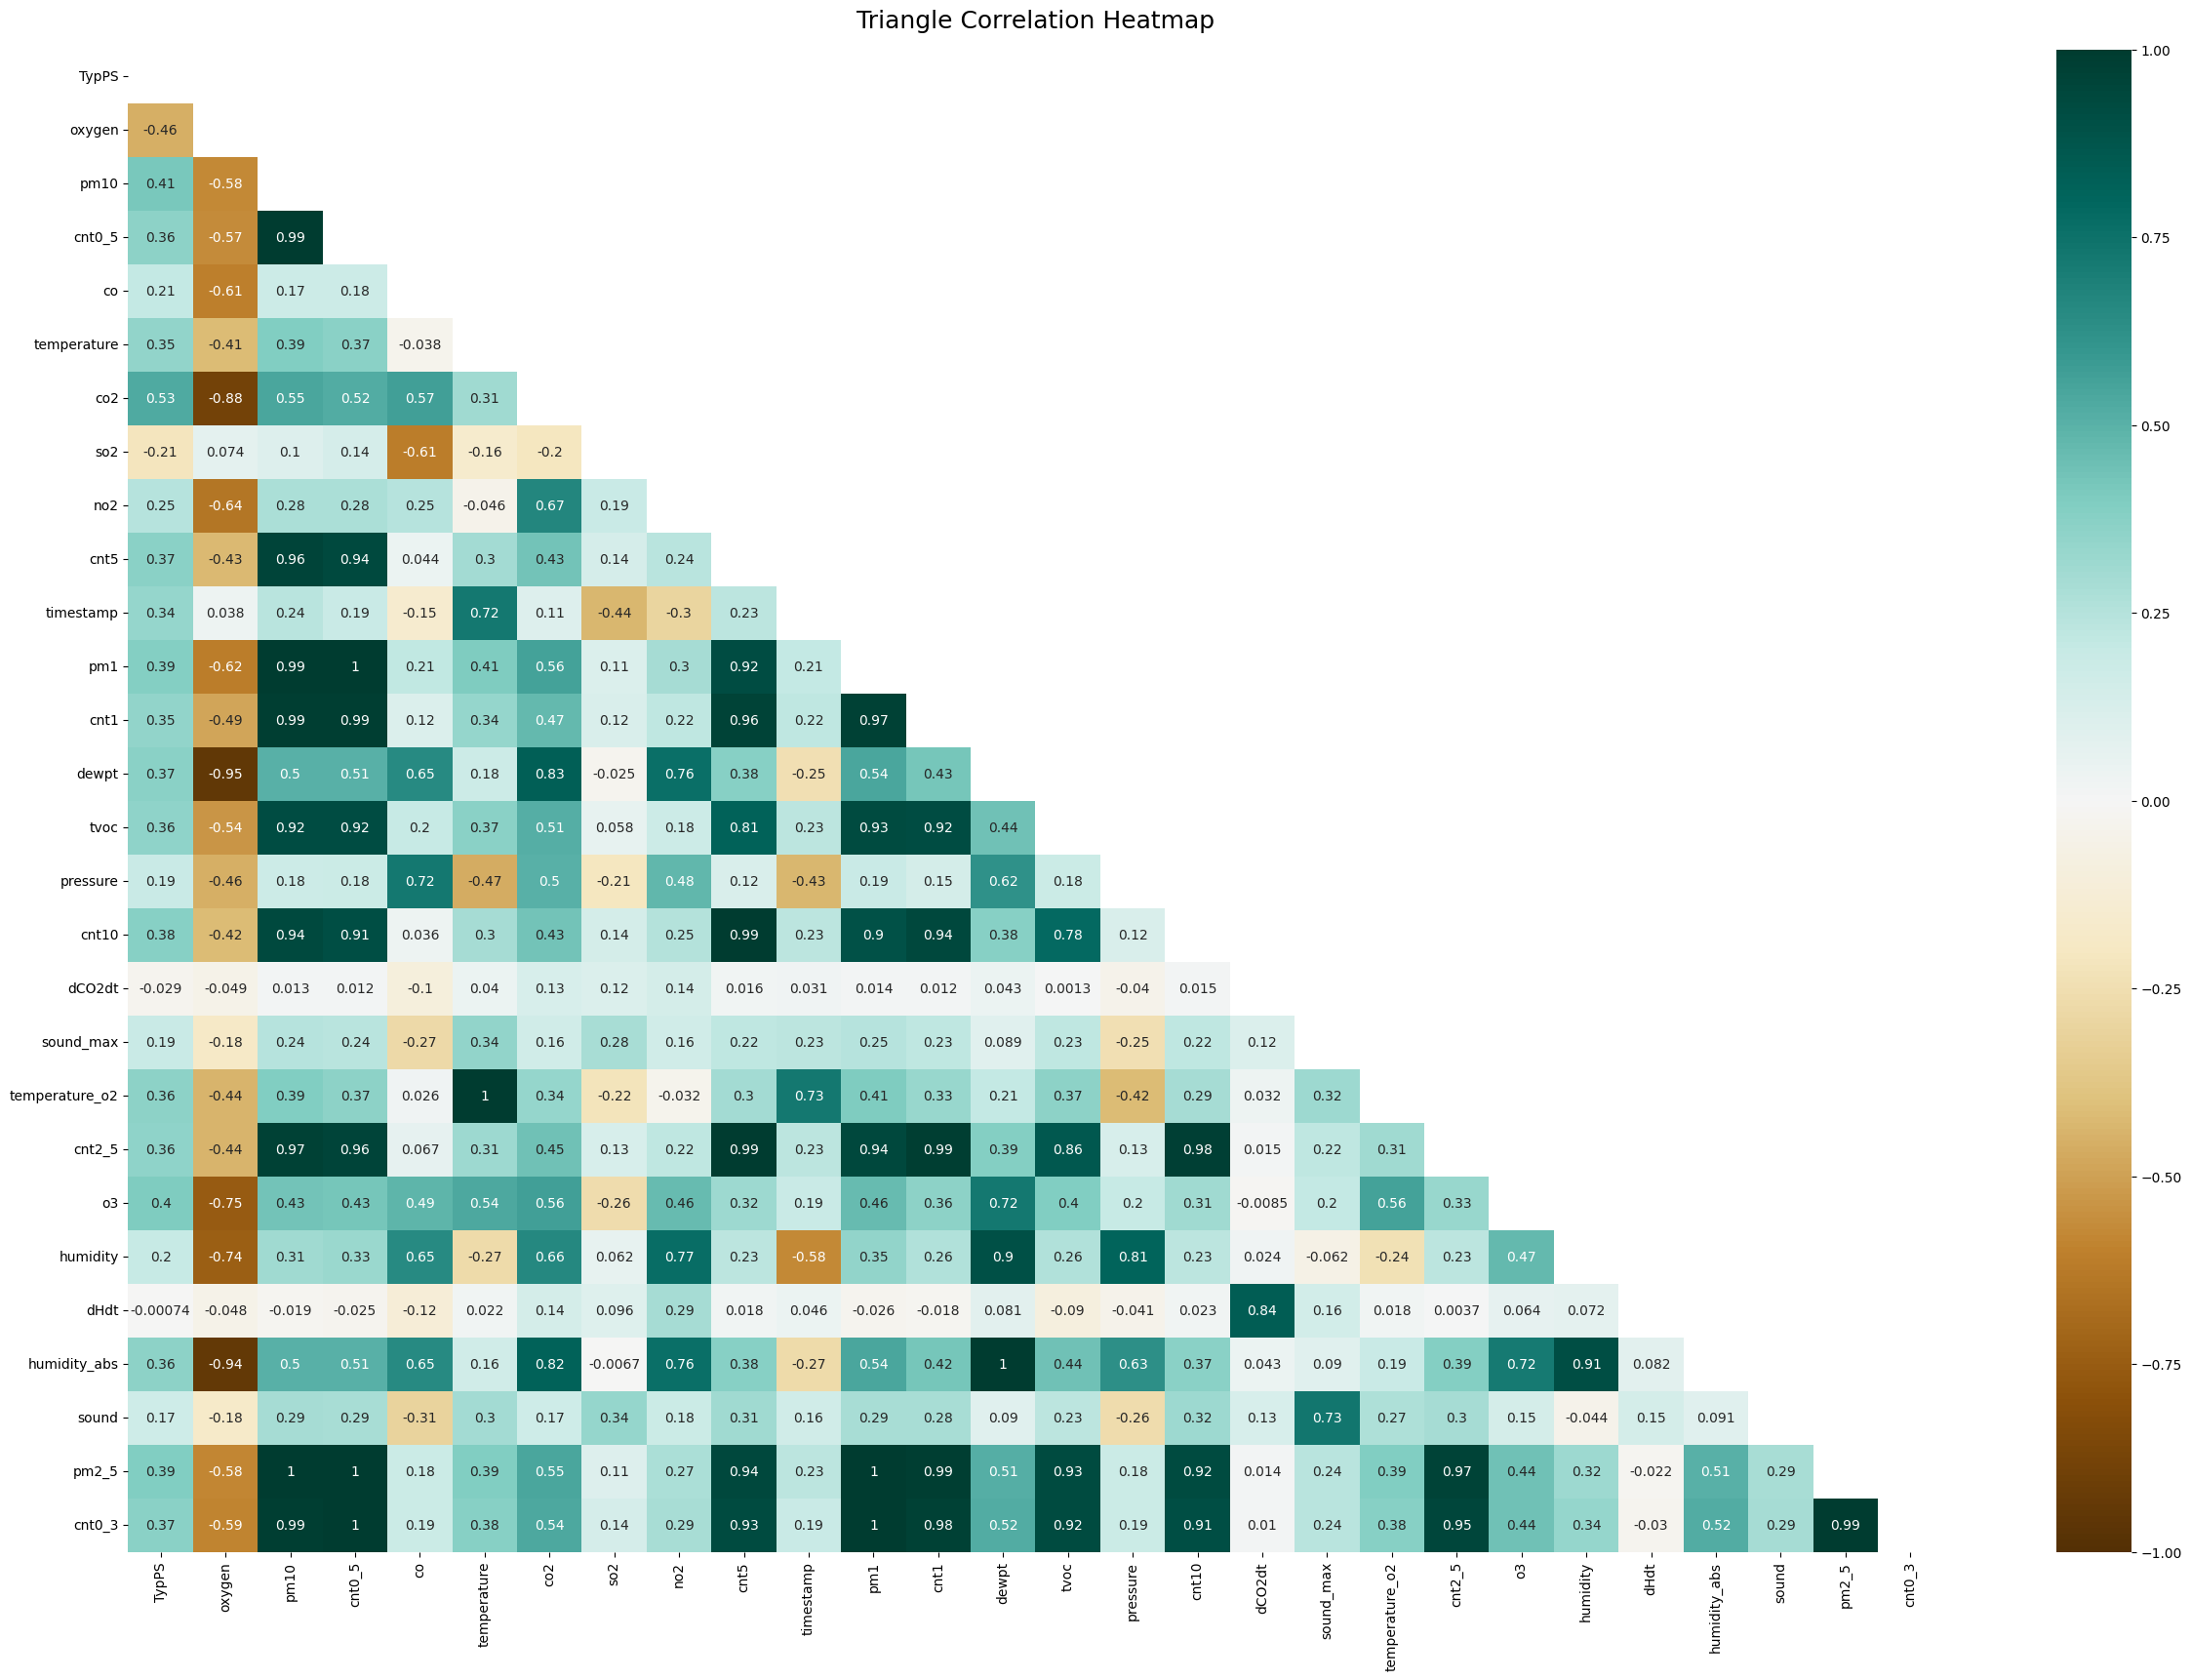

In [14]:
# Heatmap der Korrelationen
analytics_handler_case1.triangle_correlation_heatmap()

In [15]:
# Korrelationen der Variablen mit Threshold-Wert 0.7
analytics_handler_case1.analyze_correlations(0.7)

Correlation between dewpt and humidity_abs:                 0.9991425012041448
Correlation between pm10 and pm2_5:                         0.998833450001855
Correlation between cnt0_5 and cnt0_3:                      0.9973867023609174
Correlation between pm1 and cnt0_3:                         0.9973260963667001
Correlation between pm2_5 and cnt0_5:                       0.9968921204012647
Correlation between pm1 and cnt0_5:                         0.9967423758589202
Correlation between temperature_o2 and temperature:         0.9961126577143438
Correlation between pm1 and pm2_5:                          0.995988265226385
Correlation between pm2_5 and cnt0_3:                       0.9947780778855476
Correlation between pm10 and cnt0_5:                        0.9940801828636393
Correlation between cnt10 and cnt5:                         0.9940570740782413
Correlation between pm1 and pm10:                           0.992293171197673
Correlation between cnt5 and cnt2_5:                   

___
"dewpt" (Taupunkt) und "humidity_abs" (Absolute Luftfeuchtigkeit): Eine sehr hohe positive Korrelation von 0.9991425012041448. Normalerweise korrelieren der Taupunkt und die absolute Luftfeuchtigkeit eng miteinander, aber eine nahezu perfekte Korrelation ist unerwartet und könnte darauf hindeuten, dass es in der Luft sehr feucht war, möglicherweise aufgrund von Wasserdampf oder Nebel während des Kochens.

"pm2_5" (Feinstaubkonzentration für die Partikel 2.5 µm) und "pm10" (Feinstaubkonzentration für die Partikel 10 µm): Eine sehr hohe positive Korrelation von 0.998833450001855. Eine so starke Korrelation zwischen den Feinstaubkonzentrationen unterschiedlicher Partikelgrößen ist üblicherweise nicht zu erwarten und könnte darauf hindeuten, dass während des Kochens feine Partikel in der Luft vorhanden waren.

"cnt0_3" (Gesamtzahl der Feinstaub-Partikel größer als 0,3 µm) und "cnt0_5" (Gesamtzahl der Feinstaub-Partikel größer als 0,5 µm): Eine sehr hohe positive Korrelation von 0.9973867023609174. Normalerweise haben diese beiden Feinstaub-Partikelgrößen keine so starke lineare Beziehung, aber sie könnten auf bestimmte Feinstaubquellen während des Kochens zurückzuführen sein.

"o3" (O3-Konzentration) und "humidity_abs" (Absolute Luftfeuchtigkeit): Eine relativ hohe positive Korrelation von 0.717651932882436. Normalerweise sind Ozonkonzentrationen und absolute Luftfeuchtigkeit nicht stark miteinander verbunden, aber in diesem Fall könnte es auf die spezifischen Bedingungen während des Kochens und die Freisetzung bestimmter Stoffe in die Luft zurückzuführen sein.
___



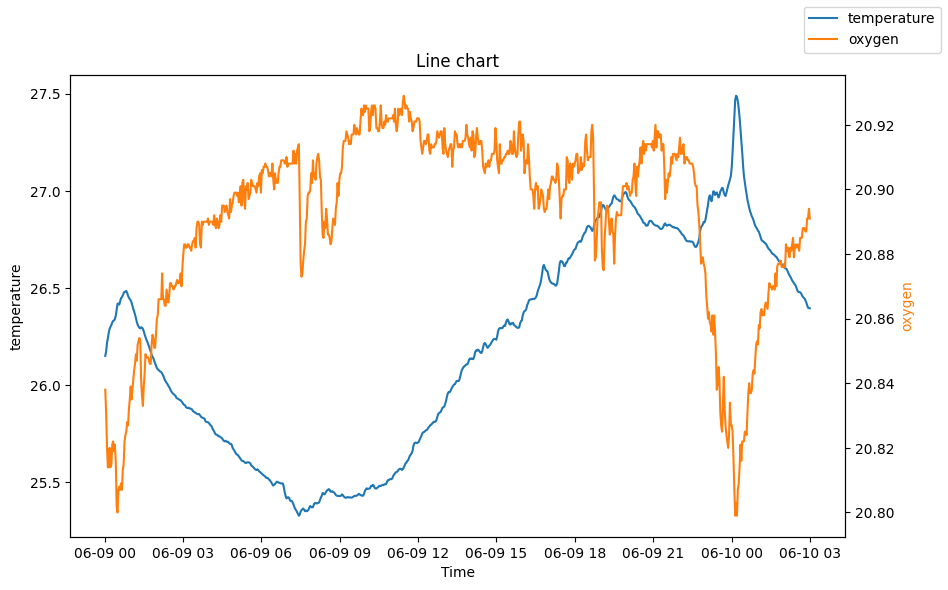

In [16]:
# Linechart für die Variablen "temperature" und "oxygen"
analytics_handler_case1.plot_line_chart(["temperature", "oxygen"],dual_axis = True)

Correlation coefficient between temperature and oxygen: -0.41435740991318765


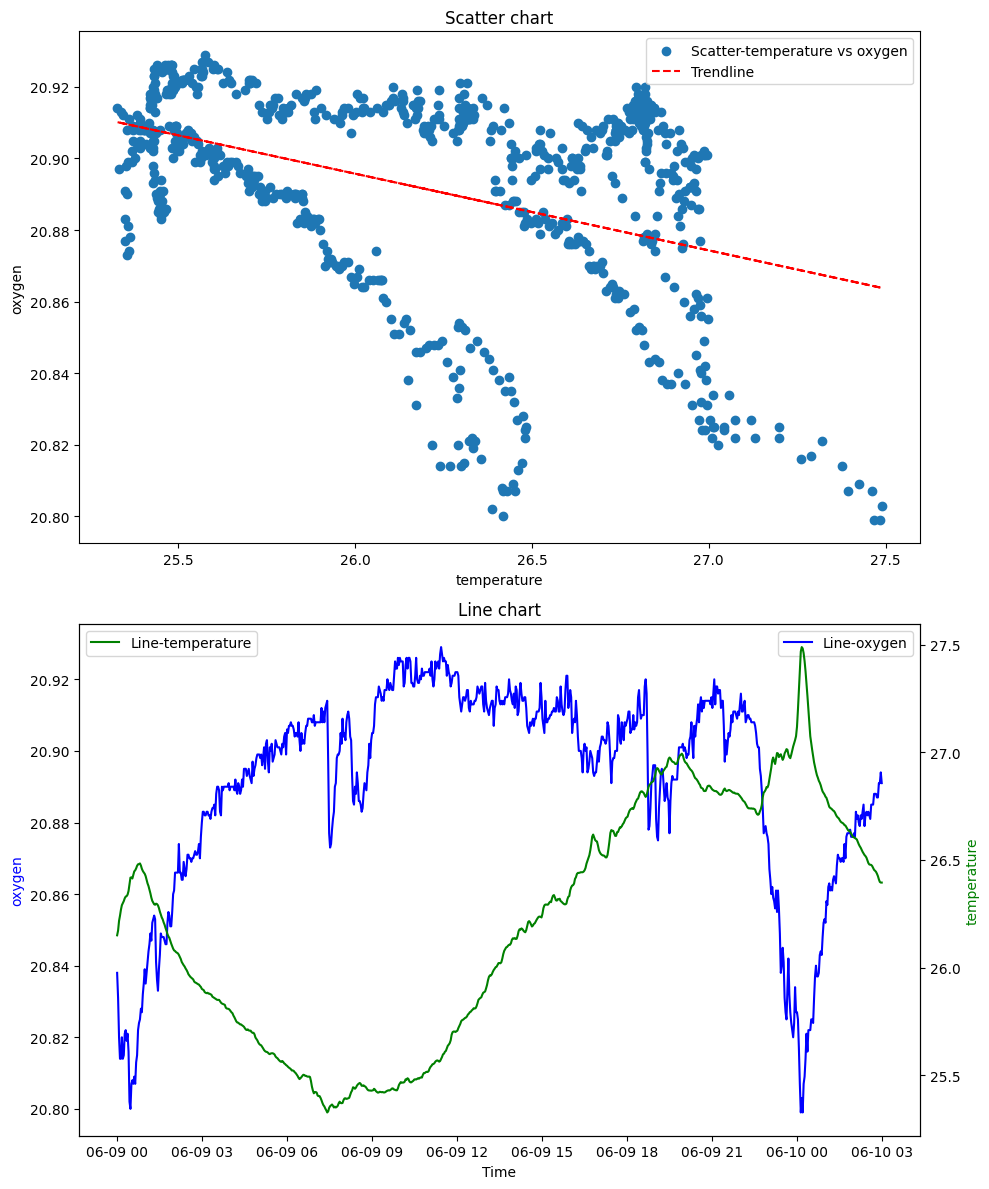

In [17]:
# Untersuchung der Korrelation zwischen "temperature" und "oxygen" mit Scatter-Plot und Line-Chart
analytics_handler_case1.invesigate_correlation("temperature", "oxygen", True)

# 2. Fall: Case 17.06

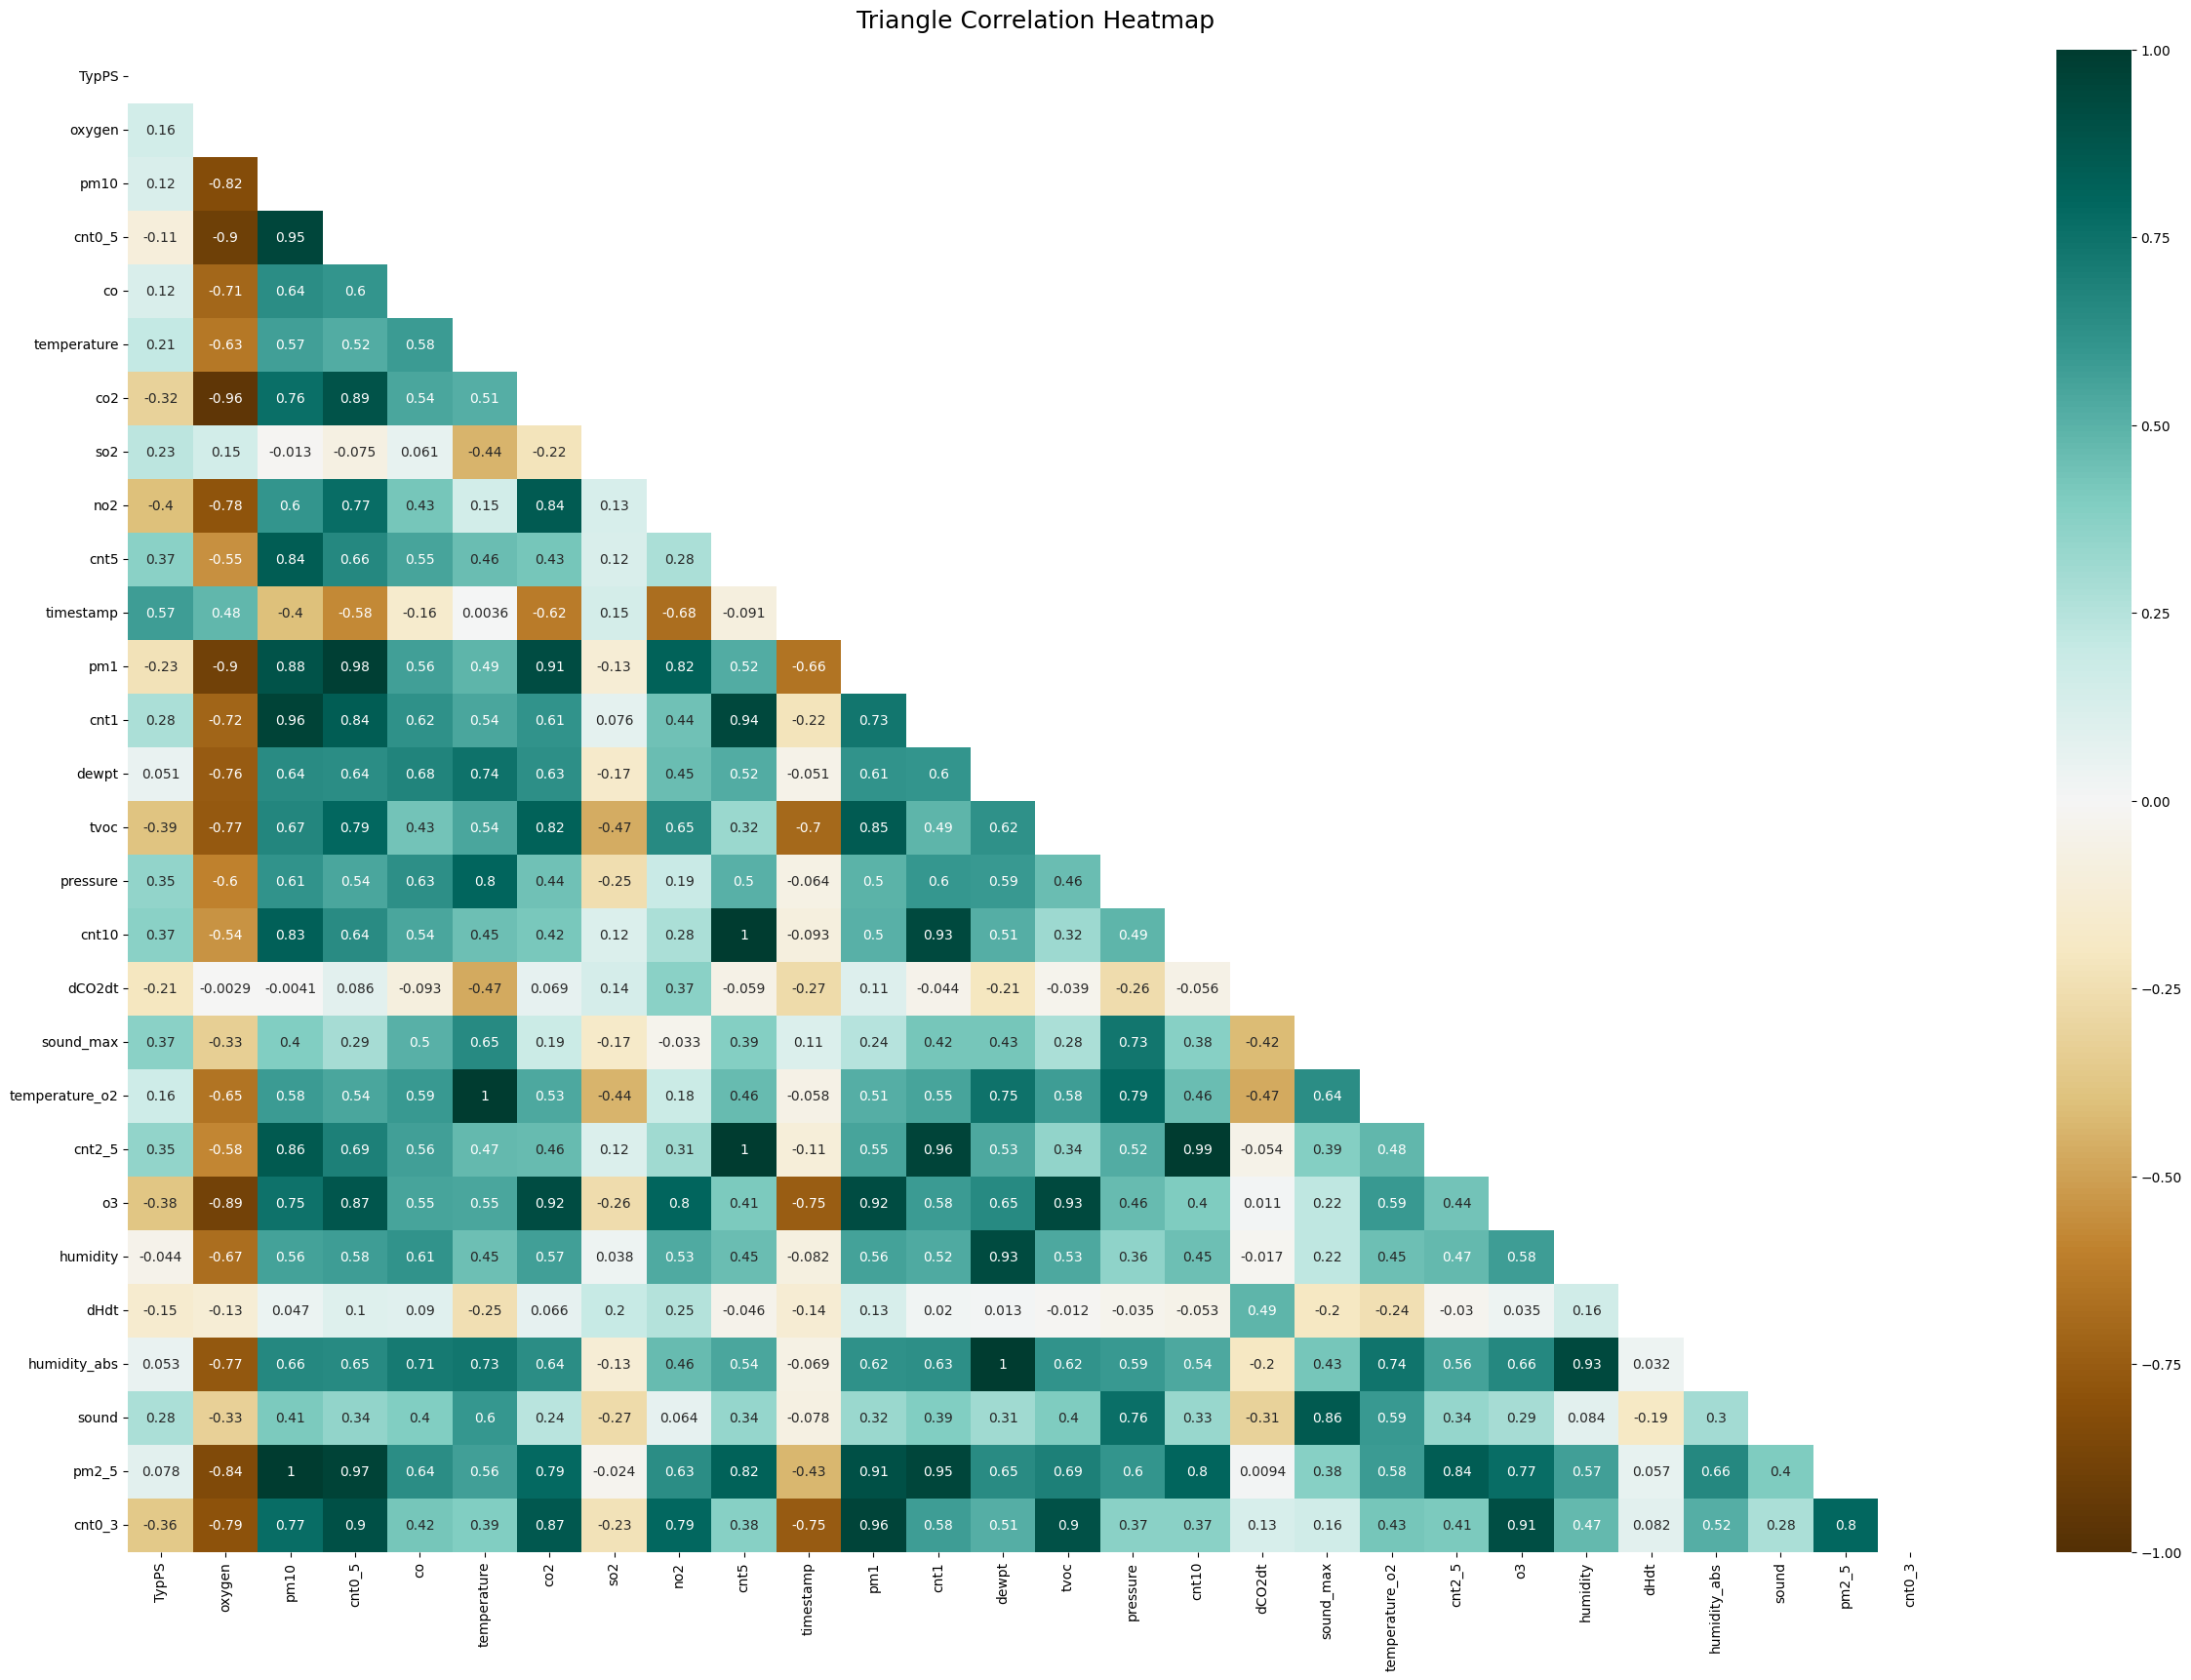

In [18]:
# Heatmap der Korrelationen
analytics_handler_case2.triangle_correlation_heatmap()

In [19]:
# Korrelationen der Variablen mit Threshold-Wert 0.7
analytics_handler_case2.analyze_correlations(0.7)

Correlation between pm10 and pm2_5:                         0.9986942213555294
Correlation between cnt5 and cnt2_5:                        0.9977386542575593
Correlation between cnt10 and cnt5:                         0.9975250373407223
Correlation between dewpt and humidity_abs:                 0.997101632704843
Correlation between temperature_o2 and temperature:         0.9956032898915115
Correlation between cnt10 and cnt2_5:                       0.9936702226647008
Correlation between pm1 and cnt0_5:                         0.9811104994344818
Correlation between pm2_5 and cnt0_5:                       0.9664838304189017
Correlation between pm10 and cnt1:                          0.9609614127275561
Correlation between oxygen and co2:                         -0.9574149273476997
Correlation between pm1 and cnt0_3:                         0.9570598465533845
Correlation between cnt2_5 and cnt1:                        0.9565374172730616
Correlation between pm10 and cnt0_5:                

___
"pm2_5" (Feinstaubkonzentration für die Partikel 2.5 µm) und "pm10" (Feinstaubkonzentration für die Partikel 10 µm): Eine sehr hohe positive Korrelation von 0.9986942213555294. Die Korrelation zwischen diesen beiden Partikelgrößen ist normalerweise stark, da größere Partikel in der Regel auch kleinere Partikel enthalten. In einem Hochzeitssaal mit vielen Gästen, die möglicherweise Aktivitäten wie Tanzen und Bewegung ausüben, könnten Feinstaubpartikel durch Bewegung, Staub und andere Quellen erhöht werden, was zu einer starken Korrelation zwischen den Partikelgrößen führt.

"cnt5" (Gesamtzahl der Feinstaub-Partikel größer als 5 µm) und "cnt2_5" (Gesamtzahl der Feinstaub-Partikel größer als 2,5 µm): Eine sehr hohe positive Korrelation von 0.9977386542575593. Ähnlich wie bei der Korrelation zwischen "pm2_5" und "pm10" könnte die Bewegung und Aktivität der Hochzeitsgäste dazu führen, dass größere Partikel (über 5 µm) auch kleinere Partikel (über 2,5 µm) enthalten, was zu dieser hohen Korrelation führt.

"o3" (O3-Konzentration) und "tvoc" (VOC-Konzentration in ppb): Eine hohe positive Korrelation von 0.9333793877896231. O3 (Ozon) und VOCs (flüchtige organische Verbindungen) können aus verschiedenen Quellen stammen, einschließlich Reinigungsmitteln, Parfüms und anderen Produkten. In einem gut besuchten Hochzeitssaal mit vielen Gästen könnten diese Quellen zur Erhöhung der Konzentrationen beitragen, was zu einer Korrelation zwischen O3 und VOCs führt.

"humidity_abs" (Absolute Luftfeuchtigkeit) und "co" (CO-Konzentration in ppm): Eine moderate positive Korrelation von 0.7112256865160328. Die Korrelation zwischen Luftfeuchtigkeit und CO-Konzentration ist normalerweise nicht stark. In einem gut besuchten Hochzeitssaal mit vielen Menschen und möglicherweise Rauch von Zigaretten oder anderen Aktivitäten könnte die CO-Konzentration jedoch erhöht sein, was zu einer Korrelation mit der Luftfeuchtigkeit führt.
___

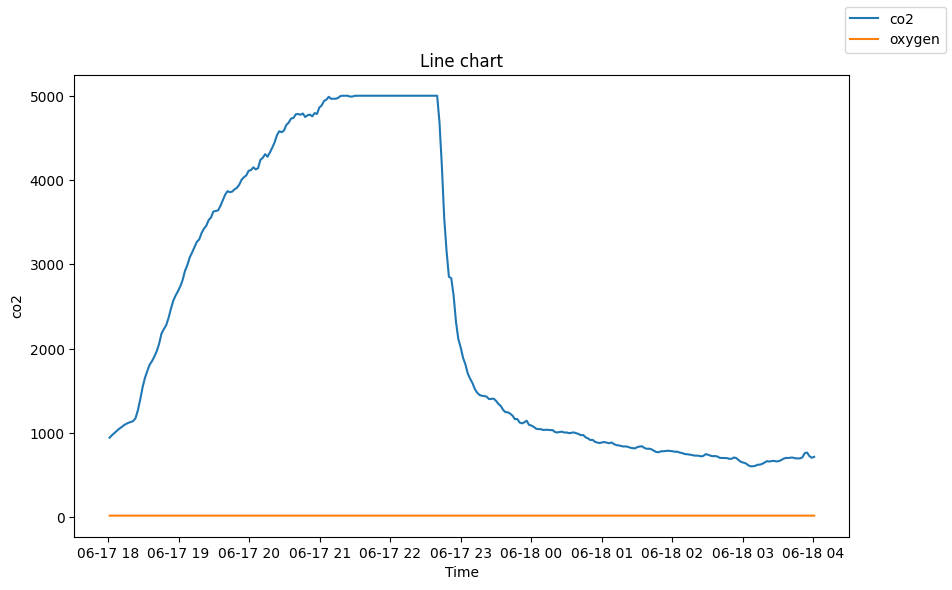

In [20]:
# Linechart für die Variablen "temperature" und "oxygen"
analytics_handler_case2.plot_line_chart(["co2", "oxygen"])

Correlation coefficient between co2 and oxygen: -0.9574149273476956


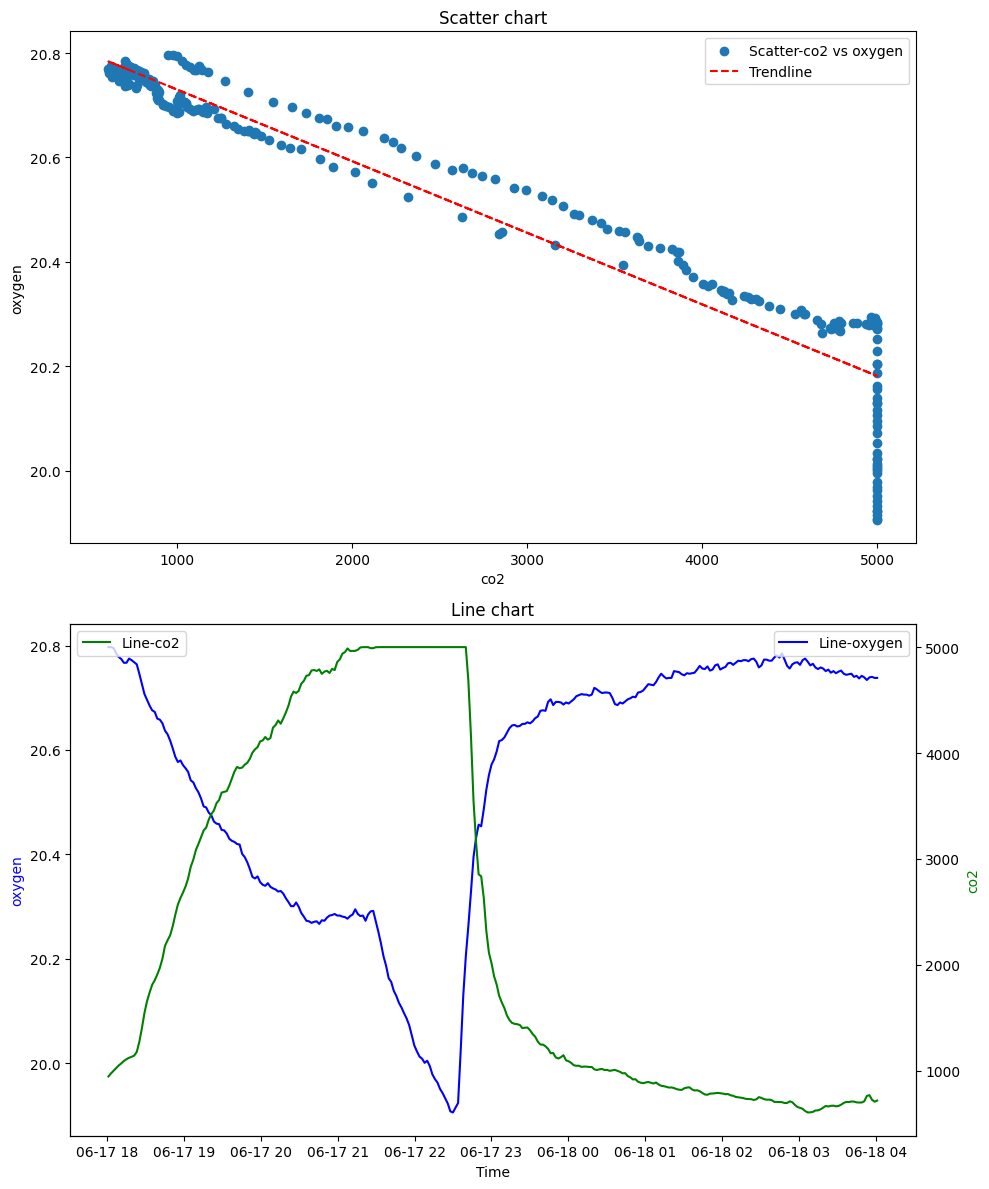

In [21]:
# Untersuchung der Korrelation zwischen "temperature" und "oxygen" mit Scatter-Plot und Line-Chart
analytics_handler_case2.invesigate_correlation("co2", "oxygen", True)

# 3. Fall: Case 19.06

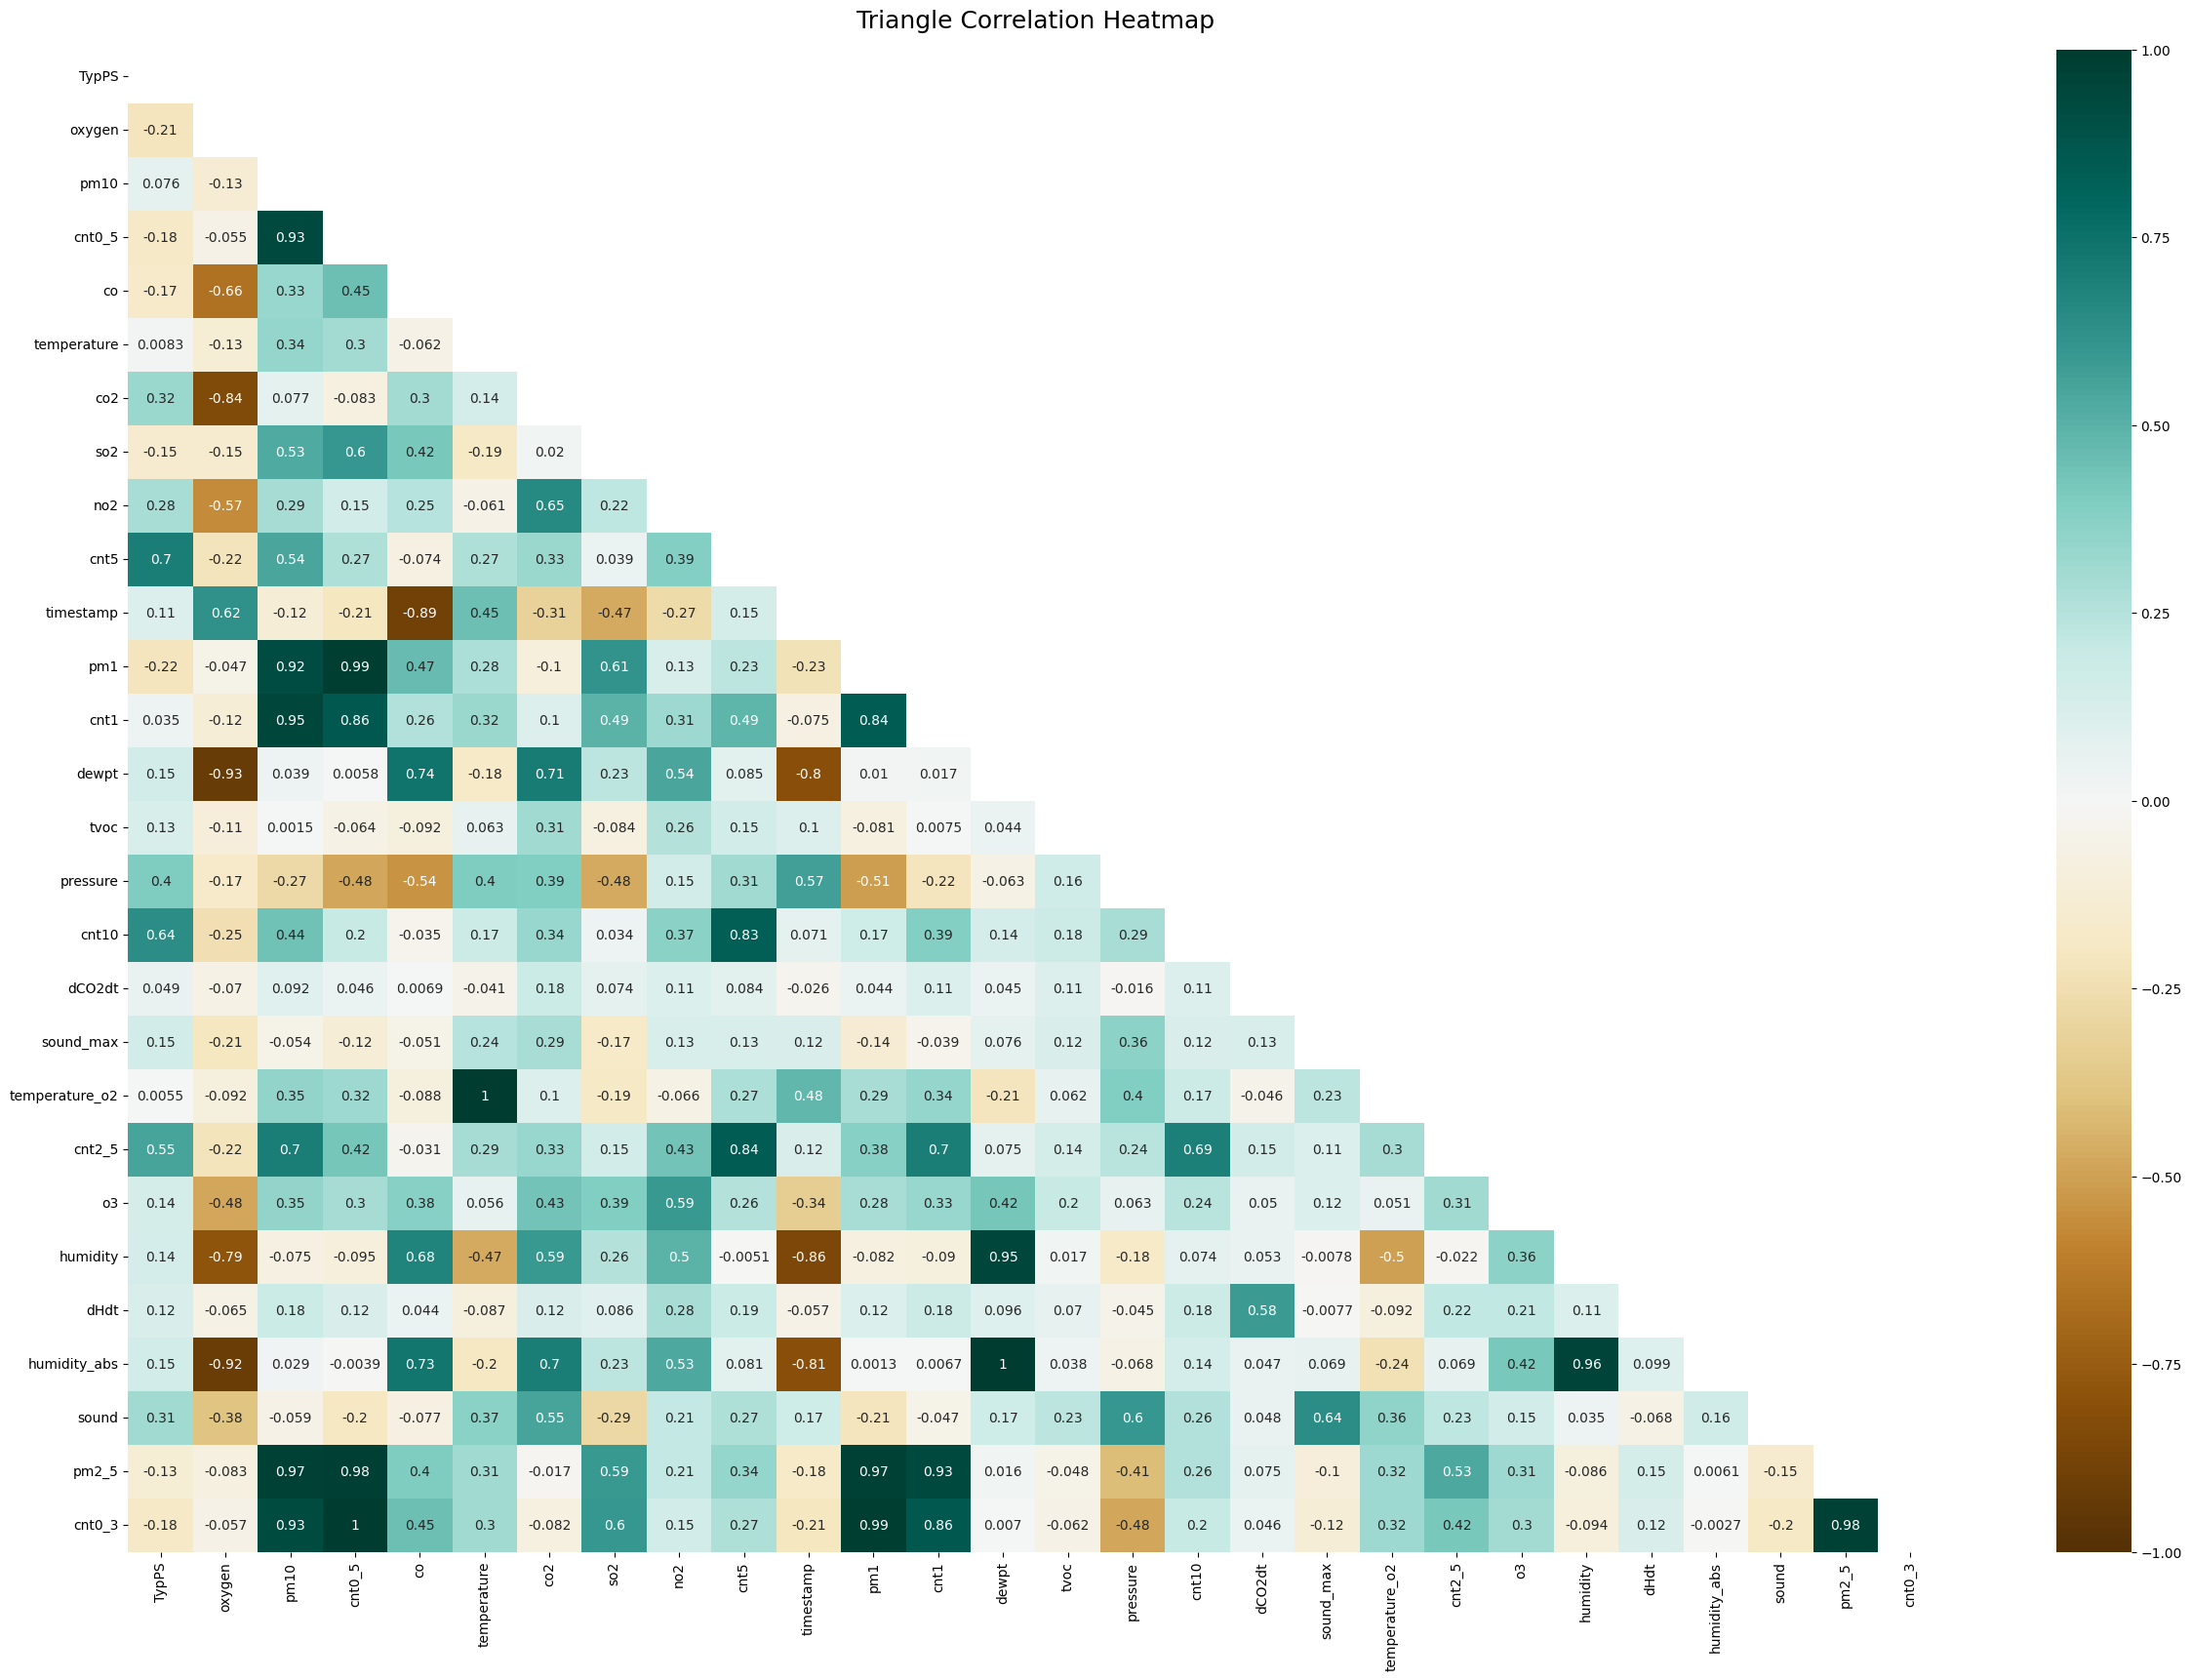

In [22]:
# Heatmap der Korrelationen
analytics_handler_case3.triangle_correlation_heatmap()

In [23]:
# Korrelationen der Variablen mit Threshold-Wert 0.7
analytics_handler_case3.analyze_correlations(0.7)

Correlation between cnt0_5 and cnt0_3:                      0.9995654460892243
Correlation between dewpt and humidity_abs:                 0.9993236371158439
Correlation between temperature_o2 and temperature:         0.9961303644817135
Correlation between pm1 and cnt0_5:                         0.9911412069490045
Correlation between pm1 and cnt0_3:                         0.990606739853488
Correlation between pm2_5 and cnt0_5:                       0.9776425154150663
Correlation between pm2_5 and cnt0_3:                       0.9765233482288649
Correlation between pm1 and pm2_5:                          0.9714356146099111
Correlation between pm10 and pm2_5:                         0.9701489273393944
Correlation between humidity_abs and humidity:              0.95853607028031
Correlation between pm10 and cnt1:                          0.9519324998239589
Correlation between dewpt and humidity:                     0.9509601979337087
Correlation between pm2_5 and cnt1:                    

___
"cnt0_3" (Gesamtzahl der Feinstaub-Partikel größer als 0,3 µm) und "cnt0_5" (Gesamtzahl der Feinstaub-Partikel größer als 0,5 µm): Eine sehr hohe positive Korrelation von 0.9995654460892243. Während des Kochens können Partikel und Dämpfe in der Luft entstehen, die zu einer gleichzeitigen Zunahme der Gesamtzahl der Feinstaubpartikel in beiden Größenklassen führen.

"dewpt" (Taupunkt) und "humidity_abs" (Absolute Luftfeuchtigkeit): Eine sehr hohe positive Korrelation von 0.9993236371158439. Beim Kochen können sich die Luftfeuchtigkeit und der Taupunkt in Innenräumen verändern, und das Kochen kann auch Feuchtigkeit freisetzen, was zu einer engen Beziehung zwischen diesen beiden Variablen führt.

"temperature_o2" (Temperatur in °C) und "temperature" (Temperatur in °C): Eine hohe positive Korrelation von 0.9961303644817135. Das Kochen mit einem Gasherd kann die Innentemperatur erhöhen und zu einer starken Korrelation zwischen den beiden Temperaturwerten führen.

"oxygen" (Sauerstoff-Konzentration in Volumen-Prozent) und "co2" (CO2-Konzentration in ppm): Eine hohe negative Korrelation von -0.8424623046153036. Während des Kochens kann Sauerstoff verbraucht und CO2 erzeugt werden, was zu einer negativen Korrelation zwischen diesen beiden Variablen führt.

"co" (CO-Konzentration in ppm) und "timestamp" (Zeitstempel): Eine hohe negative Korrelation von -0.8932299152664038. Möglicherweise wurde der Gasherd während des Kochens verwendet, wodurch CO in der Luft freigesetzt wurde und zu einer negativen Korrelation zwischen CO und der Zeit (Timestamp) führte.
___

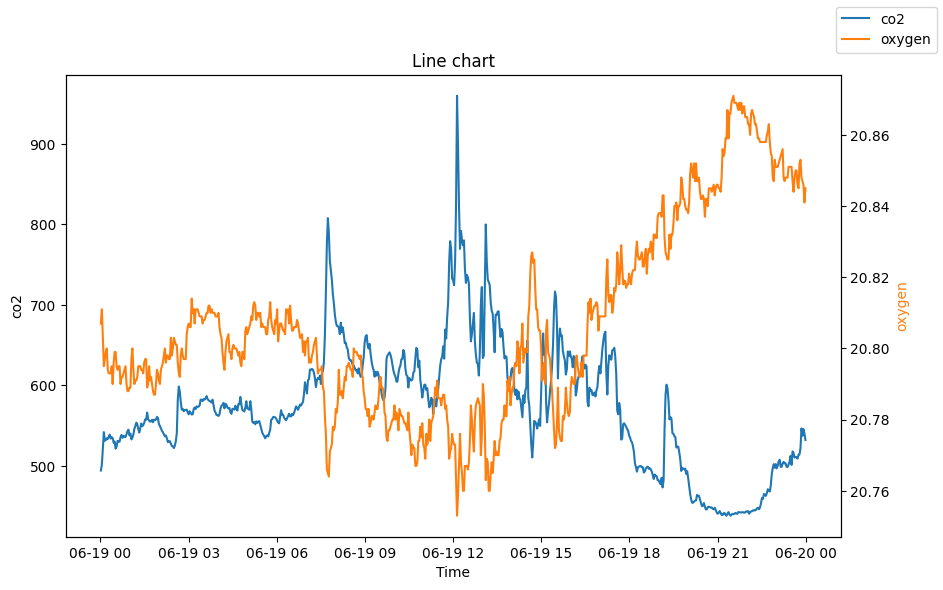

In [26]:
# Linechart für die Variablen "temperature" und "oxygen"
analytics_handler_case3.plot_line_chart(["co2", "oxygen"], dual_axis= True)

Correlation coefficient between co2 and oxygen: -0.8424623046152476


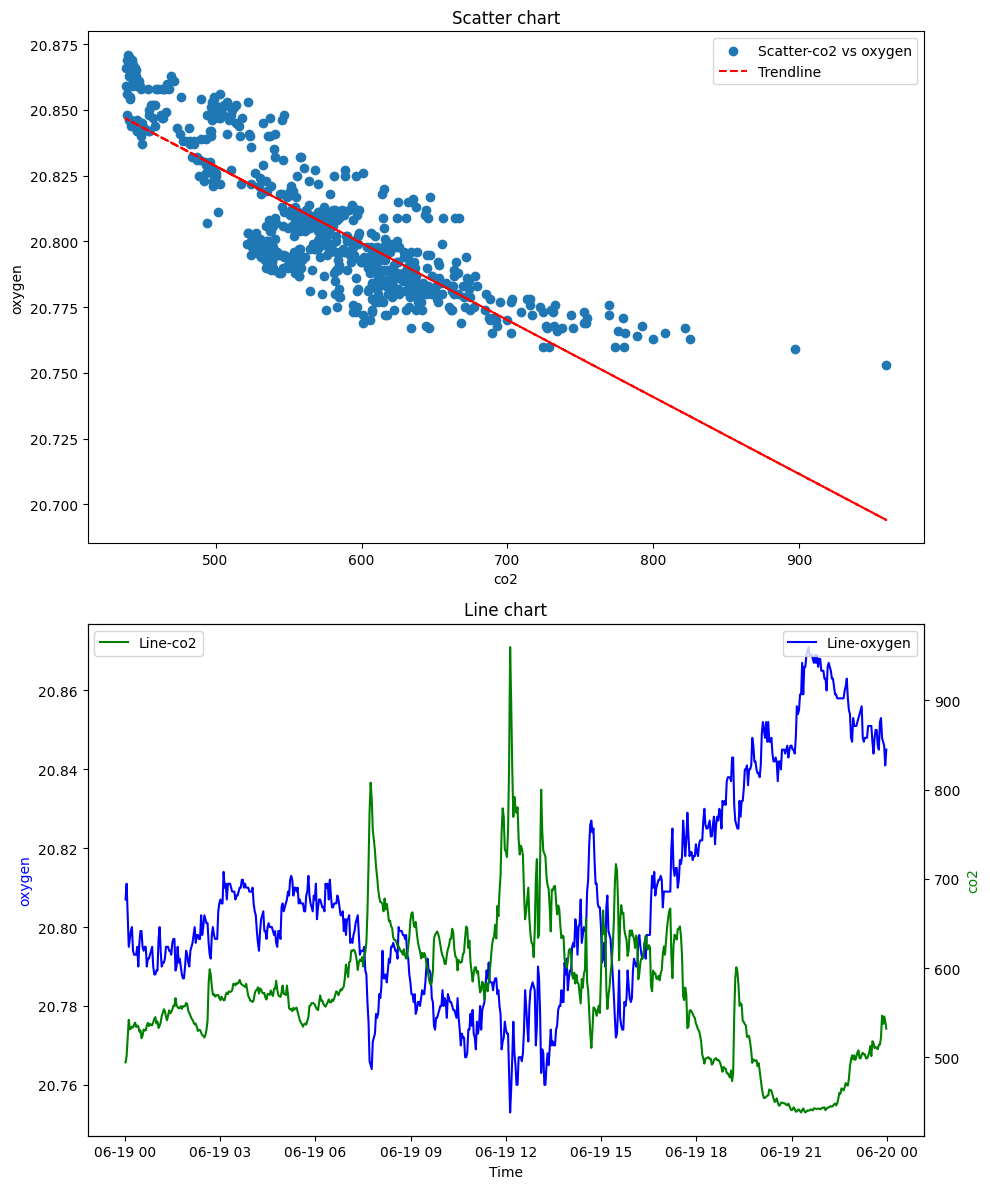

In [25]:
# Untersuchung der Korrelation zwischen "temperature" und "oxygen" mit Scatter-Plot und Line-Chart
analytics_handler_case3.invesigate_correlation("co2", "oxygen", True)